In [1]:
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
print (df.shape) #to show rows and coulumns

(8807, 12)


In [7]:
df.info() # to show coulums names and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
df.dropna(subset=['duration','rating','date_added'],inplace=True)

In [13]:
df.shape

(8790, 12)

In [15]:
df['director']= df['director'].fillna("unknown")
df['cast']=df['cast'].fillna("unknown")
df['country']=df['country'].fillna("unknown")

In [16]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [17]:
df.describe(include='all') #summary

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8790,8790,8790,8790,8790,8790,8790,8790.000000,8790,8790,8790,8790
unique,8790,2,8790,4527,7679,749,1765,NaN,14,220,513,8758
top,s1,Movie,Dick Johnson Is Dead,unknown,unknown,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6126,1,2621,825,2809,109,NaN,3205,1791,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.183163,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.825466,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Movies vs Tv shows')

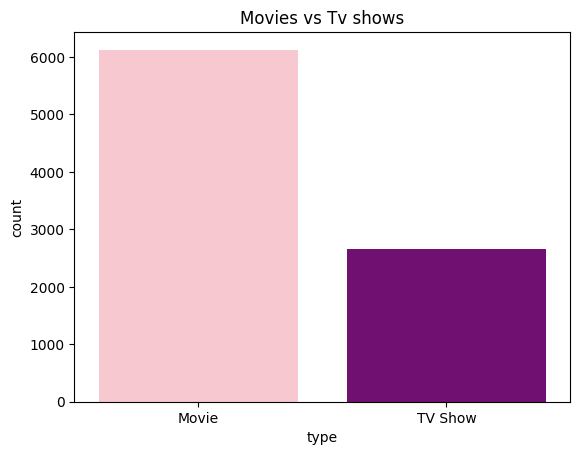

In [51]:
sns.countplot(x='type',data=df,hue='type', palette=['pink', 'purple'], legend=False)
plt.title("Movies vs Tv shows")

Text(0.5, 1.0, 'Top 10 Countries Producing Netflix Content')

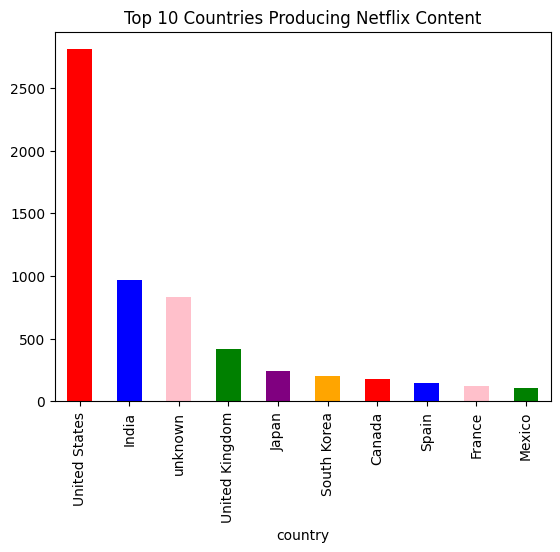

In [27]:
df['country'].value_counts().head(10).plot(kind='bar',color=['red','blue','pink','green','purple','orange'])
plt.title("Top 10 Countries Producing Netflix Content")


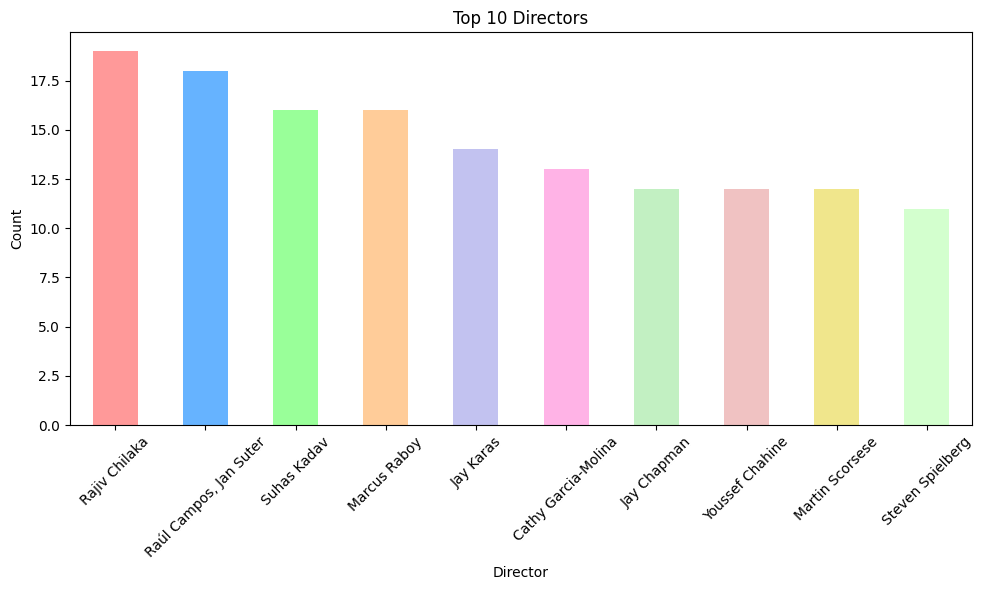

In [39]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c2f0c2','#f0c2c2','#f0e68c','#d3ffce']
top_directors = df[df['director'] != 'unknown']['director'].value_counts().head(10)

top_directors.plot(kind='bar', color=colors, figsize=(10,6))
plt.title("Top 10 Directors")
plt.xlabel("Director")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Genre/Category')

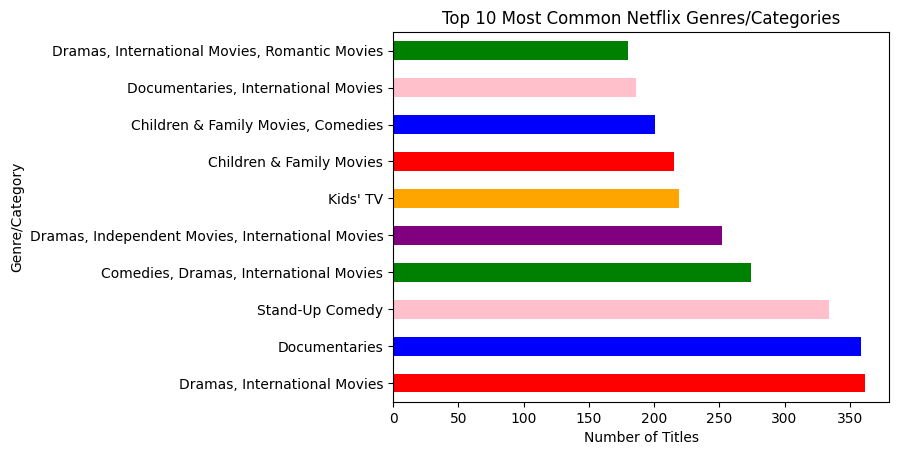

In [42]:
df['listed_in'].value_counts().head(10).plot(kind='barh',color=['red','blue','pink','green','purple','orange'])
plt.title("Top 10 Most Common Netflix Genres/Categories")
plt.xlabel("Number of Titles")
plt.ylabel("Genre/Category")

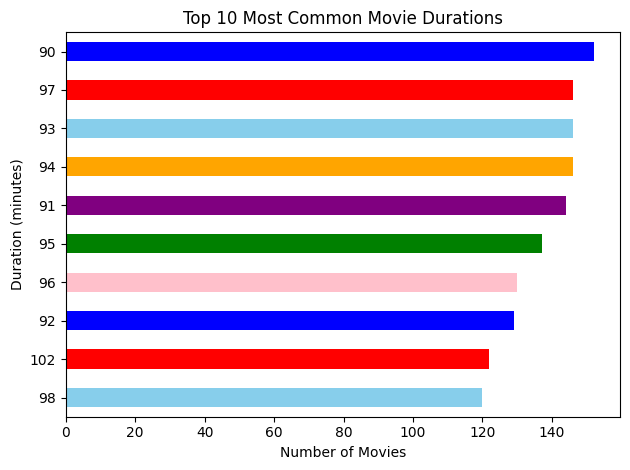

In [46]:
import matplotlib.pyplot as plt

# Get top 10 most common movie durations
duration_counts = df_movies['duration'].value_counts().head(10)

# Plot horizontal bar chart
duration_counts.sort_values().plot(kind='barh', color=['skyblue','red','blue','pink','green','purple','orange'])

plt.title("Top 10 Most Common Movie Durations")
plt.xlabel("Number of Movies")
plt.ylabel("Duration (minutes)")
plt.tight_layout()
plt.show()


#### #📊 Conclusion – Netflix Data Analysis Using Python

In this project, we conducted a comprehensive exploratory data analysis (EDA) on a Netflix dataset
 using Python and Jupyter Notebook. Here's a summary of our key findings:

 ✅ Movies are more prevalent on Netflix compared to TV Shows.
 ✅ The United States is the top content-producing country, followed by India, the UK, and others.
 ✅ The average movie duration mostly ranges from 90 to 120 minutes.
 ✅ 'Dramas', 'International Movies', and 'Comedies' are the most common genres on Netflix.


🧠 Tools Used: Pandas, Seaborn, Matplotlib
📈 Skills Demonstrated: Data cleaning, visualization, feature engineering

